* link para baixar o ZIP das cotações históricas: http://bvmf.bmfbovespa.com.br/InstDados/SerHist/COTAHIST_A(ano_da_serie).ZIP

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import mplcyberpunk

plt.style.use('cyberpunk')

In [2]:
listaAnos = [1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 
             2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022]

In [3]:
tamanhoCampos = [2,8,2,12,3,12,10,3,4,13,13,13,13,13,13,13,5,18,18,13,1,8,7,13,12,3]

listaDfs = []

for ano in listaAnos:

    arquivoBovespa = f'COTAHIST_A{ano}.TXT'

    dadosAcoes = pd.read_fwf(arquivoBovespa, widths=tamanhoCampos, header=0, encoding = 'unicode_escape')

    dadosAcoes.columns = [
    'tipo_registro',
    'data_pregao',
    'cod_bdi',
    'cod_negociacao',
    'tipo_mercado',
    'noma_empresa',
    'especificacao_papel',
    'prazo_dias_merc_termo',
    'moeda_referencia',
    'preco_abertura',
    'preco_maximo',
    'preco_minimo',
    'preco_medio',
    'preco_ultimo_negocio',
    'preco_melhor_oferta_compra',
    'preco_melhor_oferta_venda',
    'numero_negocios',
    'quantidade_papeis_negociados',
    'volume_total_negociado',
    'preco_exercicio',
    'ìndicador_correcao_precos',
    'data_vencimento',
    'fator_cotacao',
    'preco_exercicio_pontos',
    'codigo_isin',
    'num_distribuicao_papel'
    ]

    linha = len(dadosAcoes['data_pregao'])
    dadosAcoes = dadosAcoes.drop(linha - 1)

    listaVirgula = [
    'preco_abertura',
    'preco_maximo',
    'preco_minimo',
    'preco_medio',
    'preco_ultimo_negocio',
    'preco_melhor_oferta_compra',
    'preco_melhor_oferta_venda',
    'volume_total_negociado',
    'preco_exercicio',
    'preco_exercicio_pontos'
    ]

    for coluna in listaVirgula:
        dadosAcoes[coluna] = [i/100. for i in dadosAcoes[coluna]]


    # Tipos de Mercado:
    # 10 -> Mercado à Vista
    # 20 -> Fracionário
    # 70 -> Opção de Compra
    # 80 -> Opção de Venda
    
    dfFiltrado = dadosAcoes[dadosAcoes['tipo_mercado'] == 10]

    listaDfs.append(dfFiltrado)

In [4]:
baseDadosFinal = pd.concat(listaDfs)

In [5]:
baseDadosFinal

,tipo_registro,data_pregao,cod_bdi,cod_negociacao,tipo_mercado,noma_empresa,especificacao_papel,prazo_dias_merc_termo,moeda_referencia,preco_abertura,...,numero_negocios,quantidade_papeis_negociados,volume_total_negociado,preco_exercicio,ìndicador_correcao_precos,data_vencimento,fator_cotacao,preco_exercicio_pontos,codigo_isin,num_distribuicao_papel
0,1,19950102,2.0,ACE 3,10,ACESITA,ON *INT,NaN,R$,63.00,...,1.0,200000.0,12600.0,0.0,0.0,99991231.0,1000.0,0.0,ACESACON,119.0
1,1,19950102,2.0,ACE 4,10,ACESITA,PN *INT,NaN,R$,73.00,...,5.0,5300000.0,385400.0,0.0,0.0,99991231.0,1000.0,0.0,ACESACPN,119.0
2,1,19950102,2.0,ALP 4,10,ALPARGATAS,PN *,NaN,R$,160.00,...,11.0,1610000.0,257652.0,0.0,0.0,99991231.0,1000.0,0.0,ALPAACPN,142.0
3,1,19950102,2.0,ROS 4,10,AMADEO ROSSI,PN *,NaN,R$,1.85,...,1.0,300000.0,555.0,0.0,0.0,99991231.0,1000.0,0.0,ROSIACPN,125.0
4,1,19950102,2.0,BAS 4,10,AMERICA SUL,PN *I94,NaN,R$,48.00,...,1.0,15000.0,720.0,0.0,0.0,99991231.0,1000.0,0.0,BASUACPN,170.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1234922,1,20221125,2.0,EMBR3,10,EMBRAER,ON NM,NaN,R$,14.50,...,8054.0,3989300.0,57638555.0,0.0,0.0,99991231.0,1.0,0.0,BREMBRACNOR4,190.0
1234923,1,20221125,35.0,INBR32,10,INTER CO,DR2,NaN,R$,12.74,...,28134.0,1919920.0,24257778.6,0.0,0.0,99991231.0,1.0,0.0,BRINBRBDR007,101.0
1234924,1,20221125,2.0,INEP3,10,INEPAR,ON,NaN,R$,1.20,...,1690.0,7311600.0,9272758.0,0.0,0.0,99991231.0,1.0,0.0,BRINEPACNOR1,142.0
1234925,1,20221125,2.0,INEP4,10,INEPAR,PN,NaN,R$,1.09,...,941.0,2672500.0,3037508.0,0.0,0.0,99991231.0,1.0,0.0,BRINEPACNPR8,142.0


In [7]:
VALE3 = baseDadosFinal[baseDadosFinal['cod_negociacao'] == 'VALE3']
VALE3 = VALE3.set_index('data_pregao')
VALE3.index = pd.to_datetime(VALE3.index, format = '%Y%m%d')
VALE3

,tipo_registro,cod_bdi,cod_negociacao,tipo_mercado,noma_empresa,especificacao_papel,prazo_dias_merc_termo,moeda_referencia,preco_abertura,preco_maximo,...,numero_negocios,quantidade_papeis_negociados,volume_total_negociado,preco_exercicio,ìndicador_correcao_precos,data_vencimento,fator_cotacao,preco_exercicio_pontos,codigo_isin,num_distribuicao_papel
data_pregao,,,,,,,,,,,,,,,,,,,,,
1998-03-16,1,2.0,VALE3,10,VALE R DOCE,ON,NaN,R$,24.50,24.55,...,22.0,14700.0,3.590210e+05,0.0,0.0,99991231.0,1.0,0.0,BRVALEACNOR0,150.0
1998-03-17,1,2.0,VALE3,10,VALE R DOCE,ON,NaN,R$,24.60,25.20,...,28.0,42300.0,1.049284e+06,0.0,0.0,99991231.0,1.0,0.0,BRVALEACNOR0,150.0
1998-03-18,1,2.0,VALE3,10,VALE R DOCE,ON,NaN,R$,25.00,25.75,...,22.0,32300.0,8.212520e+05,0.0,0.0,99991231.0,1.0,0.0,BRVALEACNOR0,150.0
1998-03-20,1,2.0,VALE3,10,VALE R DOCE,ON,NaN,R$,25.75,26.50,...,22.0,22700.0,5.956100e+05,0.0,0.0,99991231.0,1.0,0.0,BRVALEACNOR0,150.0
1998-03-23,1,2.0,VALE3,10,VALE R DOCE,ON,NaN,R$,26.30,26.49,...,5.0,44900.0,1.186494e+06,0.0,0.0,99991231.0,1.0,0.0,BRVALEACNOR0,150.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-11-17,1,2.0,VALE3,10,VALE,ON NM,NaN,R$,80.87,83.29,...,95054.0,31790500.0,2.606936e+09,0.0,0.0,99991231.0,1.0,0.0,BRVALEACNOR0,205.0
2022-11-03,1,2.0,VALE3,10,VALE,ON NM,NaN,R$,67.64,67.94,...,91566.0,34390300.0,2.309153e+09,0.0,0.0,99991231.0,1.0,0.0,BRVALEACNOR0,205.0
2022-12-01,1,2.0,VALE3,10,VALE,ON NM,NaN,R$,86.42,86.75,...,88532.0,34319300.0,2.951304e+09,0.0,0.0,99991231.0,1.0,0.0,BRVALEACNOR0,205.0


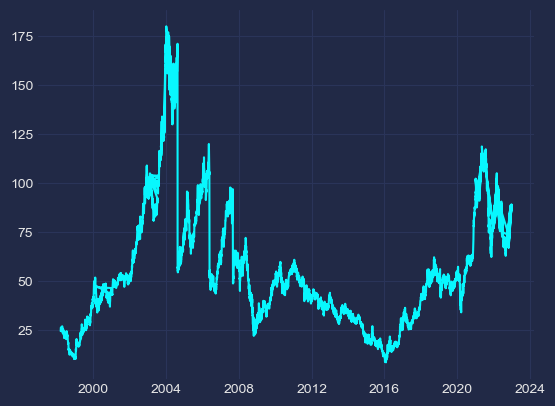

In [9]:
plt.plot(VALE3['preco_ultimo_negocio'])